#Case Study Prompt:

BACKGROUND FROM EMAIL: A company has a fleet of devices transmitting daily telemetry readings. They would like to create a predictive maintenance solution to proactively identify when maintenance should be performed. This approach promises cost savings over routine or time-based preventive maintenance, because tasks are performed only when warranted. 




You are tasked with building a predictive model using machine learning to predict the probability of a device failure. When building this model, be sure to minimize false positives and false negatives. The column you are trying to predict is called failure with binary value 0 for non-failure and 1 for failure. 


##### to HTML

In [ ]:
%%shell
jupyter nbconvert --to html /content/Predictive_Maintenance_CS_v2.ipynb

[NbConvertApp] Converting notebook /content/Predictive_Maintenance_CS_v2.ipynb to html
[NbConvertApp] Writing 2193304 bytes to /content/Predictive_Maintenance_CS_v2.html


# Goal of Predictive Maintenance Case Study

To build a predictive model that saves time and cost over routine preventative maintenance. 

# Conclusion & Assumptions
#### Note all Images from the Conclusion/Assumption Section are from the notebook below 

#### Assumptions 

1) Metric 8 and Metric 7 are duplicates. For that reason Metric 8 was were removed from the data set.

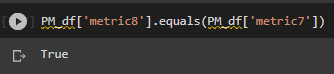

2) All the measurements were from 2015, therefore the year is not a a useful feature for prediction. However month seemed to be partially significant as the failures were higher in the first 4 months (Jan-Apr) than the last 4 months (Sep-Dec). Note these months are numeric: Month = 1 means January and Month = 12 means December. Future work could include adding month+day and make a column out of 365 days for higher accuracy.




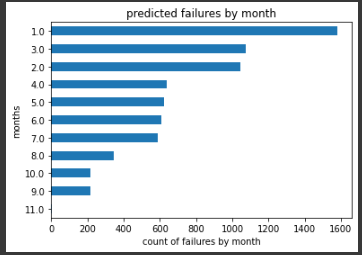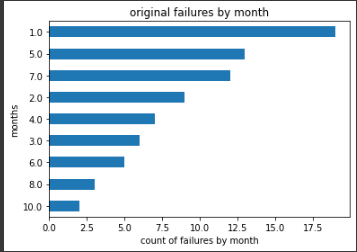

3) An assumption was made that currently 0% of failures are being predicted at this time. The goal of this model is to predict potential failures and therefore reduce the need to perform preventative maintaince on all measurements.
This model shows 5% of total measurements or 17% of total devices as having a failure, the maintenance team will have a smaller subset of devices to check. This will save cost, and time overall.

Assuming 0% of failures are being predicted at this time. The goal is to find a model that points maintenance workers towards a smaller set of devices/measurements. For example our model shows approximately 5% of total measurements as failure, which means 119000 measurements would be filtered out in the original data set. Even if the team is incorrectly conducting predictive maintenance on 5% it is still seen as a win. 

Future work would definitely include working with stakeholders to understand what is an acceptable threshold. If 2% was the goal, then the model would need to move in that direction. 



4) The last assumption is that the team would want to have the dataset split into test and training sets to ensure the model was fitted on a different data set than where it was making predictions. Note that with the conclusion and findings, everything is described in percents because the dataset was split. 

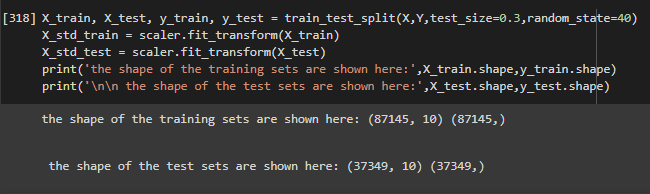

#### Conclusion
The model that was chosen was a Gaussian Mixture Model (GMM) with a linear dimensionality reduction technique called PCA used on the data before. The GMM model took in a PCA with n=3 or 3 components/dimensions. After looking at the cross tabs between predictions and actuals, it was shown that roughly 5% of working (Non-Failure) measurements were incorrectly marked as failures. Meaning a company would be flagged to conduct predictive maintanece on extra 5% of total measurements. However they would correctly conduct predictive maintanace on 65% of actual Failures. Which may be a acceptable risk from management. A total of 17% of devices were chosen by this model to have predictive maintanence done to them due to a predicted failure. 

Future work would include understanding why 35% of failures were missed by this model, and why 5% of working systems were classified as failing. This is would give higher fidelity into understanding changes that can be made to increase model accuracy.

---

Below you can see a few images taken of the notebook below:
*   Remember that the predicted values are from a data set that was split into test and training data sets.
*   Another note on cross tab for the chosen model. It shows highlighted in yellow the values that were incorrectly labeled: 6890 False Failures and 26 False Non-Failures. This equates to roughly 5.6% of measurements show a predicted failure. This again was noted as acceptable risk due to assumption 3, that the team is starting at a 0% prediction rate, and would need to conduct predictive maintanence on 100% of the systems.
*   The rest of the images describe the failure by device. The original data set did not show more than 1 failure by device, while the predicted dataset showed over 100 per device in some instances. The Total devices predicted to fail were 208 which is 17% of the total devices in this data set.





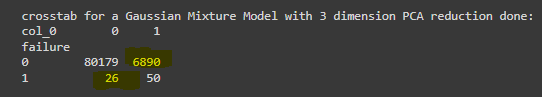

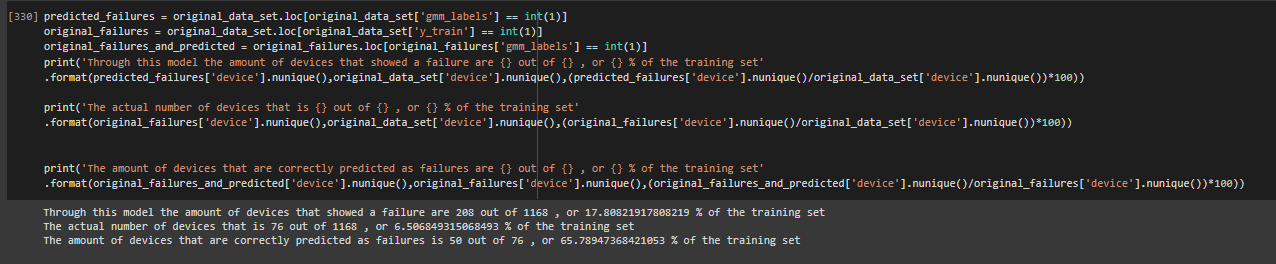

Out of 106 Failures there were 106 unique devices. Meaning there is no more than 1 failure per Device.

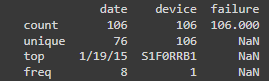

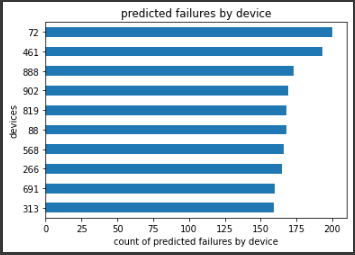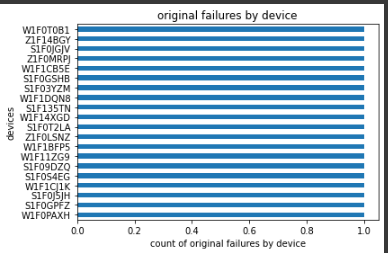

#Future Work

 

*   This model can be trained with a larger data set, to create a more robust model. Also a deeper dive into the hyper parameters of the model may help increase the accuracy. As well as explore differnt models that may be better suited for this type of data.
*   The failure column has 0.1% failures (value = 0) and 99.9% Non-Failures(value = 1). Diving deeper in how this lack of variance in the data may affect the overall model. However this specific data use case may always have this low of a failure rate. For that reason learning best practices in modeling failures that are a very small subset of the overall data is worth doing.
*   Feature analysis can be done to figure out which features should be selected for the model. For example if devices only have 1 failure per, then the significance of knowing the device type is likely not important for prediction. The idea at the start of this project was that a device could be faulty and could have above average failures, and could be used as a predictive measure.
*   Tools like the Random forest feature selection tool can be used to find weights that can be used for each feature.
*   PCA was the method used, but there are other dimension reduction techniques that could be explored like TSNE or UMAP.
*   I would also be interested in talking more with the group that provides the metrics, is there a chance more than 9 metrics could be used? Out of those 9 metrics are there clear signs and thresholds where it is more likely to produce a failure? 





# Import Tools

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from sklearn.datasets import fetch_openml
import time
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy import special
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.stats import yeojohnson
from sqlalchemy import create_engine
import warnings
from scipy.stats import boxcox
from scipy import stats
import seaborn as sns
from matplotlib.pyplot import imshow
%matplotlib inline
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn import ensemble
pd.options.display.float_format = '{:.3f}'.format
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, classification_report
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score
from scipy.stats import bartlett
from scipy.stats import levene
from statsmodels.tsa.stattools import acf
from scipy.stats import jarque_bera
from scipy.stats import normaltest
from sklearn import ensemble
from scipy.stats.mstats import winsorize
import warnings
from sklearn import tree
from sklearn import neighbors
!pip install pydotplus
!pip install graphviz
from IPython.display import HTML
import base64
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from IPython.display import HTML
import base64
import urllib.request  
import seaborn as sns
from scipy import stats
from IPython.display import HTML
import base64
from smart_open import open
import io
from google.colab import files
from PIL import Image, ImageDraw 
warnings.filterwarnings(action="ignore")
from scipy import special
from scipy.special import comb
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import silhouette_score
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
!pip install umap-learn
from sklearn.datasets import fetch_openml
import umap
from sklearn.manifold import TSNE
from matplotlib.patches import Ellipse
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn import metrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# upload files and save to PM_df

In [ ]:
uploaded = files.upload()

Saving predictive_maintenance.csv to predictive_maintenance.csv


In [ ]:
d = pd.read_csv('predictive_maintenance.csv')
PM_df = d

# print the columns and the description of the dataframe

In [ ]:
print('the columns of the csv file are: \n {} ' .format(PM_df.keys()))
print('\n\n')
print(PM_df.info())
print('\n\n')
print(PM_df.describe())

the columns of the csv file are: 
 Index(['date', 'device', 'failure', 'metric1', 'metric2', 'metric3', 'metric4',
       'metric5', 'metric6', 'metric7', 'metric8', 'metric9'],
      dtype='object') 



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   date     124494 non-null  object
 1   device   124494 non-null  object
 2   failure  124494 non-null  int64 
 3   metric1  124494 non-null  int64 
 4   metric2  124494 non-null  int64 
 5   metric3  124494 non-null  int64 
 6   metric4  124494 non-null  int64 
 7   metric5  124494 non-null  int64 
 8   metric6  124494 non-null  int64 
 9   metric7  124494 non-null  int64 
 10  metric8  124494 non-null  int64 
 11  metric9  124494 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 11.4+ MB
None



         failure       metric1    metric2    metric3    metric4    metric5  \
count 124494.00

# Explore the data that are in non-float or int form. In this case it is device/date. Also including Failure specifically because it is our predictive metric/label.

## As you can see there is a failure column, which is the predictive metric. You can see below failures = 1 accounts for approximately 0.1% of the total data in this data set. 

In [ ]:
PM_df.head(10)

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,month,year
0,1/1/15,S1F01085,0,215630672,56,0,52,6,407438,0,0,7,1,15
1,1/1/15,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0,1,15
2,1/1/15,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0,1,15
3,1/1/15,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0,1,15
4,1/1/15,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3,1,15
5,1/1/15,S1F01TD5,0,68837488,0,0,41,6,413535,0,0,1,1,15
6,1/1/15,S1F01XDJ,0,227721632,0,0,0,8,402525,0,0,0,1,15
7,1/1/15,S1F023H2,0,141503600,0,0,1,19,494462,16,16,3,1,15
8,1/1/15,S1F02A0J,0,8217840,0,1,0,14,311869,0,0,0,1,15
9,1/1/15,S1F02DZ2,0,116440096,0,323,9,9,407905,0,0,164,1,15


There are 106 Failures (1) and 124k Non-Failures (0) shown below. This is less than 0.1% failures, which will likely make predictions hard.

In [ ]:
print(PM_df.groupby("failure")["failure"].count())

failure
0    124388
1       106
Name: failure, dtype: int64


## there are two columns that are objects date and device. 

In [ ]:
print(PM_df.date.head(5))
print('\n\n',PM_df.device.head(5))

0    1/1/15
1    1/1/15
2    1/1/15
3    1/1/15
4    1/1/15
Name: date, dtype: object


 0    S1F01085
1    S1F0166B
2    S1F01E6Y
3    S1F01JE0
4    S1F01R2B
Name: device, dtype: object


Looks like no device has more than 1 failure.

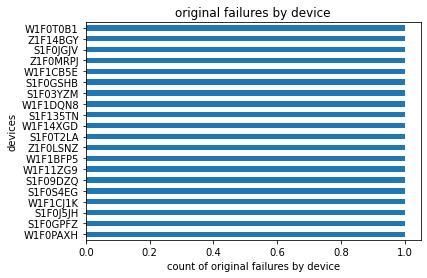

In [ ]:
u = d.loc[d['failure'] == int(1)]
ax = u.device.value_counts().sort_values(ascending = False).tail(20).plot(kind = 'barh',title = 'original failures by device')
ax.set_xlabel("count of original failures by device")
ax.set_ylabel("devices")
plt.show()

In [ ]:
print(u.describe(include = 'all'))

           date    device  failure       metric1   metric2  metric3  metric4  \
count       106       106  106.000       106.000   106.000  106.000  106.000   
unique       76       106      NaN           NaN       NaN      NaN      NaN   
top     1/19/15  S1F0RRB1      NaN           NaN       NaN      NaN      NaN   
freq          8         1      NaN           NaN       NaN      NaN      NaN   
mean        NaN       NaN    1.000 127175526.925  4109.434    3.906   54.632   
std         NaN       NaN    0.000  69401666.197 12803.747   31.557  193.493   
min         NaN       NaN    1.000   4527376.000     0.000    0.000    0.000   
25%         NaN       NaN    1.000  70462350.000     0.000    0.000    0.000   
50%         NaN       NaN    1.000 139117253.500     0.000    0.000    1.500   
75%         NaN       NaN    1.000 183706600.000  1182.000    0.000   18.750   
max         NaN       NaN    1.000 243261216.000 64784.000  318.000 1666.000   

        metric5    metric6  metric7  me

### Going to see if year/month have correlation to failures. Thinking Winter/Summer temperatures may lead to failures. Year seems to only be 2015, so we can drop that column

In [ ]:
#extracting year
PM_df2 = PM_df
temp = PM_df["date"].values
month = [my_str.split("/")[0] for my_str in temp]
PM_df2["month"] = month
year = [my_str.split("/")[2] for my_str in temp]
PM_df2["year"] = year
PM_df2 = PM_df2.astype({'month':'float'})
PM_df2 = PM_df2.astype({'year':'float'})
PM_df2 = PM_df2.astype({'date':'datetime64[ns]'})
print(PM_df2.year.describe(), PM_df2.month.describe())

count   124494.000
mean        15.000
std          0.000
min         15.000
25%         15.000
50%         15.000
75%         15.000
max         15.000
Name: year, dtype: float64 count   124494.000
mean         4.028
std          2.572
min          1.000
25%          2.000
50%          3.000
75%          6.000
max         11.000
Name: month, dtype: float64


In [ ]:
PM_df2 = PM_df2.drop(['year'], axis=1)

##We can also create a categorical variable on the device code. The idea is that the same device can have multiple readings at different Datetimes. This may make this a valueable variable for prediction. However as shown above, there are no more than 1 failure per device. So this may not be as useful as we thought.

In [ ]:
PM_df2.device = PM_df2.device.astype('category')
PM_df2.device = PM_df2.device.cat.codes.astype('int64')


### As you can see below 50% of the devices in this datasets have over 500 readings.

In [ ]:
PM_df2.device.describe()

count   124494.000
mean       622.379
std        327.178
min          0.000
25%        378.000
50%        602.000
75%        917.000
max       1168.000
Name: device, dtype: float64

# Here is the dataset we will use to explore

In [ ]:
PM_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 13 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   date     124494 non-null  datetime64[ns]
 1   device   124494 non-null  int64         
 2   failure  124494 non-null  int64         
 3   metric1  124494 non-null  int64         
 4   metric2  124494 non-null  int64         
 5   metric3  124494 non-null  int64         
 6   metric4  124494 non-null  int64         
 7   metric5  124494 non-null  int64         
 8   metric6  124494 non-null  int64         
 9   metric7  124494 non-null  int64         
 10  metric8  124494 non-null  int64         
 11  metric9  124494 non-null  int64         
 12  month    124494 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(11)
memory usage: 12.3 MB


In [ ]:
PM_df2.head(5)

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,month
0,2015-01-01,0,0,215630672,56,0,52,6,407438,0,0,7,1.000
1,2015-01-01,2,0,61370680,0,3,0,6,403174,0,0,0,1.000
2,2015-01-01,3,0,173295968,0,0,0,12,237394,0,0,0,1.000
3,2015-01-01,4,0,79694024,0,0,0,6,410186,0,0,0,1.000
4,2015-01-01,5,0,135970480,0,0,0,15,313173,0,0,3,1.000


# Explore the data

In [ ]:
PM_df.describe(include = 'all')

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,month,year
count,124494,124494,124494.000,124494.000,124494.000,124494.000,124494.000,124494.000,124494.000,124494.000,124494.000,124494.000,124494,124494
unique,304,1169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,1
top,1/1/15,Z1F0QLC1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,15
freq,1163,304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25032,124494
mean,NaN,NaN,0.001,122388103.242,159.485,9.940,1.741,14.223,260172.658,0.293,0.293,12.452,NaN,NaN
std,NaN,NaN,0.029,70459334.216,2179.658,185.747,22.909,15.943,99151.079,7.437,7.437,191.426,NaN,NaN
min,NaN,NaN,0.000,0.000,0.000,0.000,0.000,1.000,8.000,0.000,0.000,0.000,NaN,NaN
25%,NaN,NaN,0.000,61284762.000,0.000,0.000,0.000,8.000,221452.000,0.000,0.000,0.000,NaN,NaN
50%,NaN,NaN,0.000,122797388.000,0.000,0.000,0.000,10.000,249799.500,0.000,0.000,0.000,NaN,NaN
75%,NaN,NaN,0.000,183309640.000,0.000,0.000,0.000,12.000,310266.000,0.000,0.000,0.000,NaN,NaN


In [ ]:
for i in PM_df.columns:
  print('for column {} there are {} unique values' .format(i,PM_df[str(i)].nunique()))

for column date there are 304 unique values
for column device there are 1169 unique values
for column failure there are 2 unique values
for column metric1 there are 123877 unique values
for column metric2 there are 558 unique values
for column metric3 there are 47 unique values
for column metric4 there are 115 unique values
for column metric5 there are 60 unique values
for column metric6 there are 44838 unique values
for column metric7 there are 28 unique values
for column metric8 there are 28 unique values
for column metric9 there are 65 unique values
for column month there are 11 unique values
for column year there are 1 unique values


##Lets graph each row and see the distribution

        device  failure    metric1  metric2  metric3  metric4  metric5  \
0            0        0  215630672       56        0       52        6   
1            2        0   61370680        0        3        0        6   
2            3        0  173295968        0        0        0       12   
3            4        0   79694024        0        0        0        6   
4            5        0  135970480        0        0        0       15   
...        ...      ...        ...      ...      ...      ...      ...   
124489    1045        0   18310224        0        0        0       10   
124490    1068        0  172556680       96      107        4       11   
124491    1075        0   19029120     4832        0        0       11   
124492    1081        0  226953408        0        0        0       12   
124493    1082        0   17572840        0        0        0       10   

        metric6  metric7  metric9  month  
0        407438        0        7  1.000  
1        403174        0 

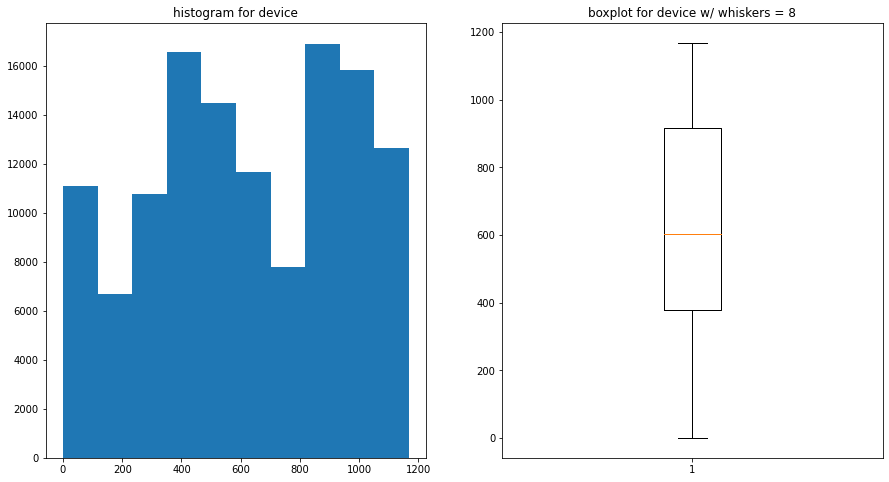

These are graphs for column: failure


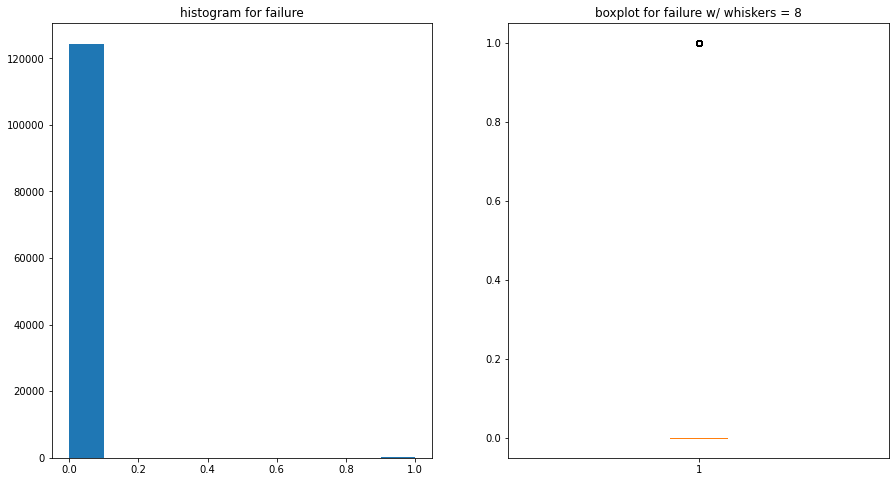

These are graphs for column: metric1


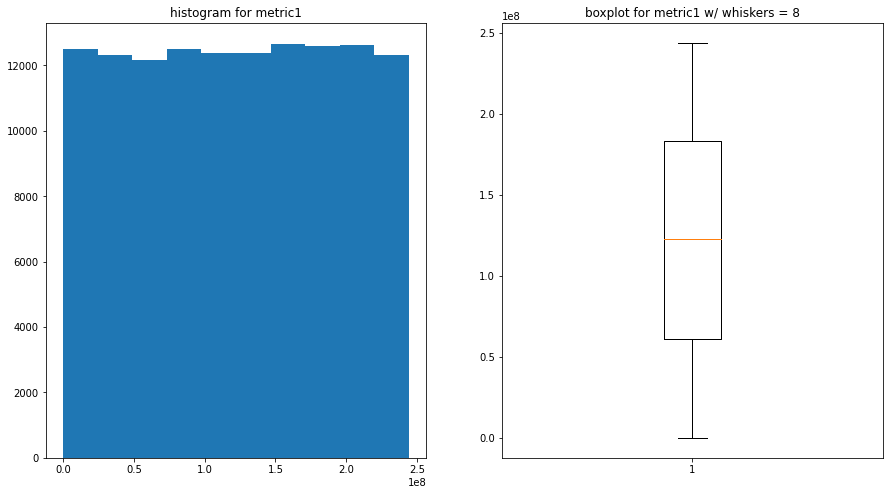

These are graphs for column: metric2


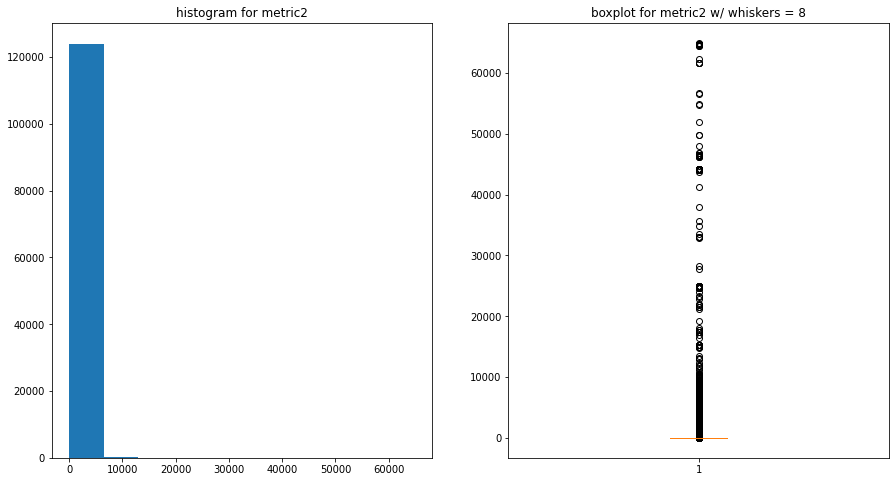

These are graphs for column: metric3


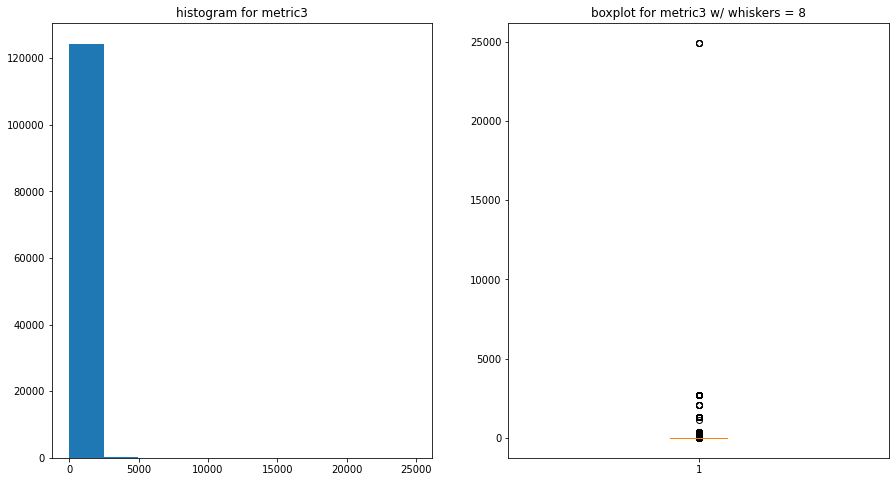

These are graphs for column: metric4


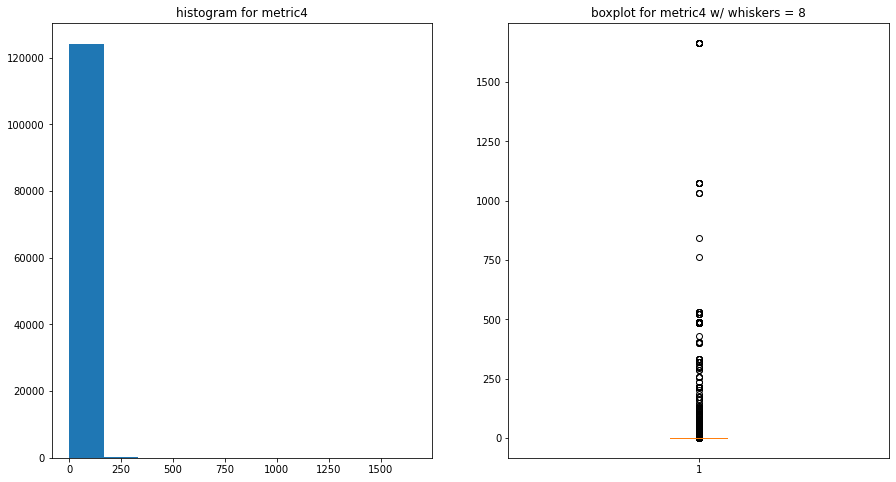

These are graphs for column: metric5


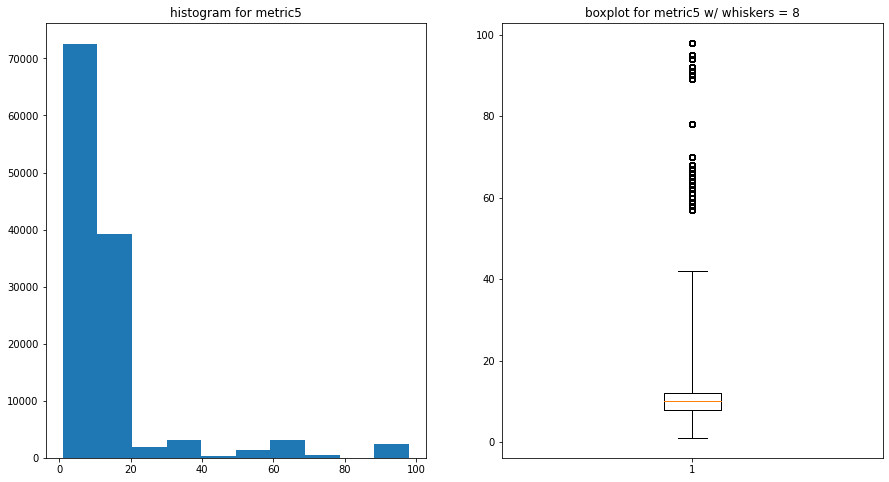

These are graphs for column: metric6


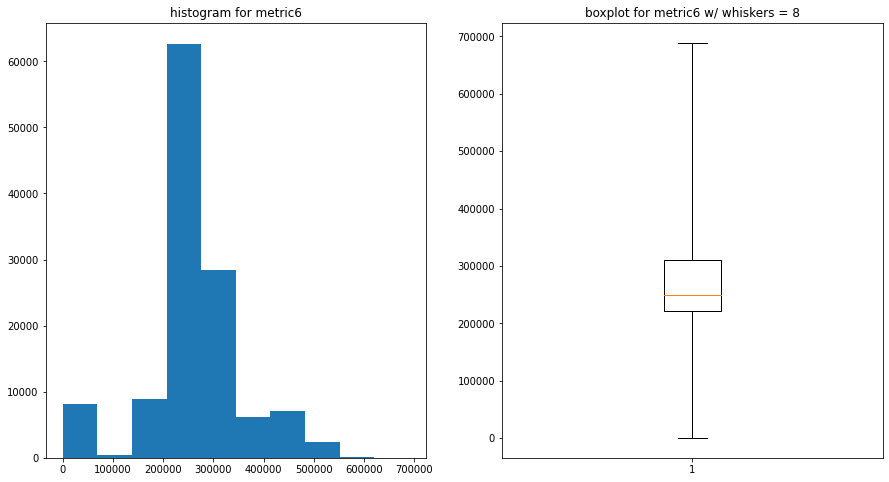

These are graphs for column: metric7


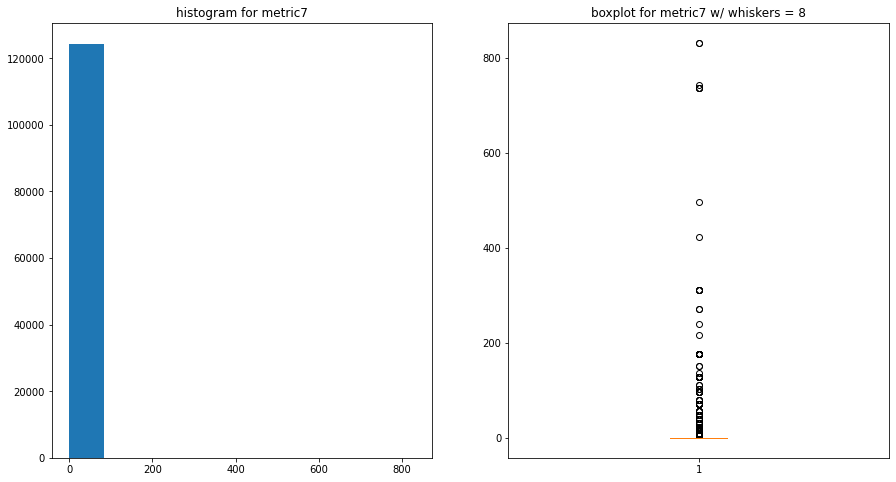

These are graphs for column: metric9


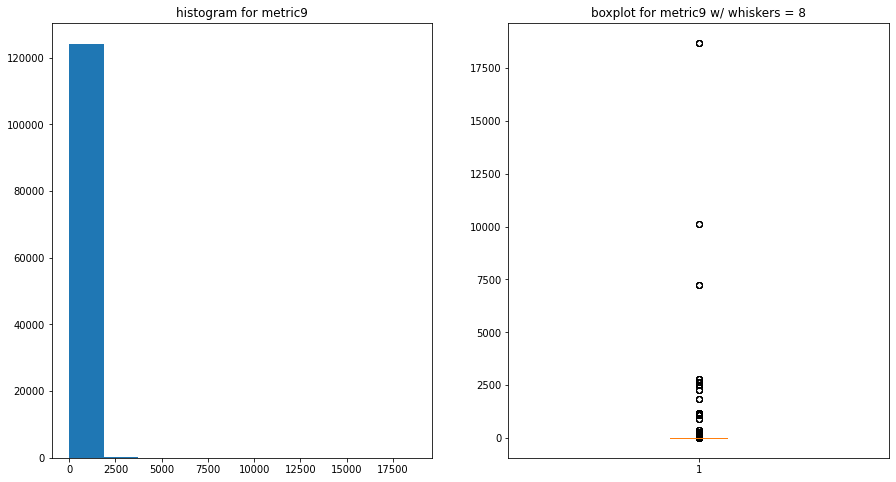

These are graphs for column: month


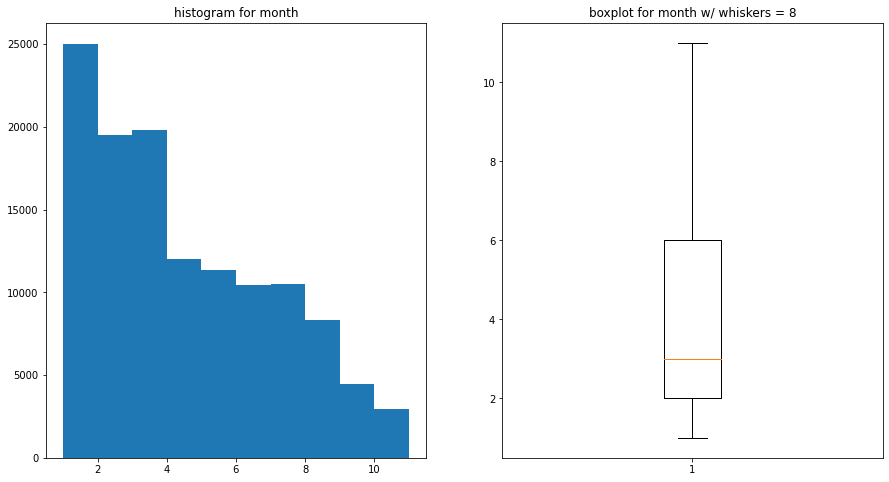

In [ ]:
i = 1
x = PM_df2.drop(['date'], axis=1)
print(x)
y = list(x.columns)
for column_name in y:
    print("These are graphs for column: {}".format(column_name))
    plt.figure(figsize = (15,8))
    plt.subplot(1,2,i)
    plt.hist(x[column_name])
    plt.title('histogram for {}'.format(column_name))
    i += 1
    plt.subplot(1,2,i)
    plt.boxplot(x[column_name],whis = 8)
    plt.title('boxplot for {} w/ whiskers = 8'.format(column_name))

    i = 1 
    
    plt.show()

## Summary of each column by failure:

### Notes on the DATA BELOW:

*    Note: Some of the differences in mean/max/min seems to be fairly significant. Force example in metric two the range goes from 0 - 64000, and the mean differs by over 1000. There is a chance an outlier may skew these results.
*    It looks like Date and Month are essentially showing the same thing.
*    Metric 2 has a 4100 mean for Failure (F) and 156 mean for non failure (NF)
*    Metric 3 shows a difference of 6 in the means
*    Metric 4 a difference in 52 in means.
*    Metric 7 shows a difference in 30 of means
*    Metric 9 shows a difference in 12 of the means


  



In [ ]:
i = 1
x = PM_df2
y = list(x.columns)
for column_name in y:
    o1 = PM_df2.groupby("failure")[column_name].mean()
    o2 = PM_df2.groupby("failure")[column_name].median()
    o3 = PM_df2.groupby("failure")[column_name].max()
    o4 = PM_df2.groupby("failure")[column_name].min() 
    print('\n\n {} ' .format(column_name))
    print(' Non Failure Cases: \n mean = {} , median = {} , max = {} , and min = {}' .format(o1[0],o2[0],o3[0],o4[0]))
    print(' Failure Cases: \n mean = {} , median = {} , max = {} , and min = {}'  .format(o1[1],o2[1],o3[1],o4[1]))




 date 
 Non Failure Cases: 
 mean = 2015-04-16 05:18:45.832073984 , median = 2015-03-27 00:00:00 , max = 2015-11-02 00:00:00 , and min = 2015-01-01 00:00:00
 Failure Cases: 
 mean = 2015-04-17 21:44:09.056603648 , median = 2015-04-24 00:00:00 , max = 2015-10-26 00:00:00 , and min = 2015-01-05 00:00:00


 device 
 Non Failure Cases: 
 mean = 622.4049988744895 , median = 601.0 , max = 1168 , and min = 0
 Failure Cases: 
 mean = 592.0943396226415 , median = 640.5 , max = 1165 , and min = 8


 failure 
 Non Failure Cases: 
 mean = 0.0 , median = 0.0 , max = 0 , and min = 0
 Failure Cases: 
 mean = 1.0 , median = 1.0 , max = 1 , and min = 1


 metric1 
 Non Failure Cases: 
 mean = 122384023.53258353 , median = 122786072.0 , max = 244140480 , and min = 0
 Failure Cases: 
 mean = 127175526.9245283 , median = 139117253.5 , max = 243261216 , and min = 4527376


 metric2 
 Non Failure Cases: 
 mean = 156.11872527896583 , median = 0.0 , max = 64968 , and min = 0
 Failure Cases: 
 mean = 4109.43

## lets see this up against a heat map to see a relationship between variables 
### Note that metric 7 and 8 look exactly the same in all pair plots and the correlation matrix. For that reason I will drop one of them.

In [ ]:
u=PM_df2.corr()

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]), <a list of 12 Text major ticklabel objects>)

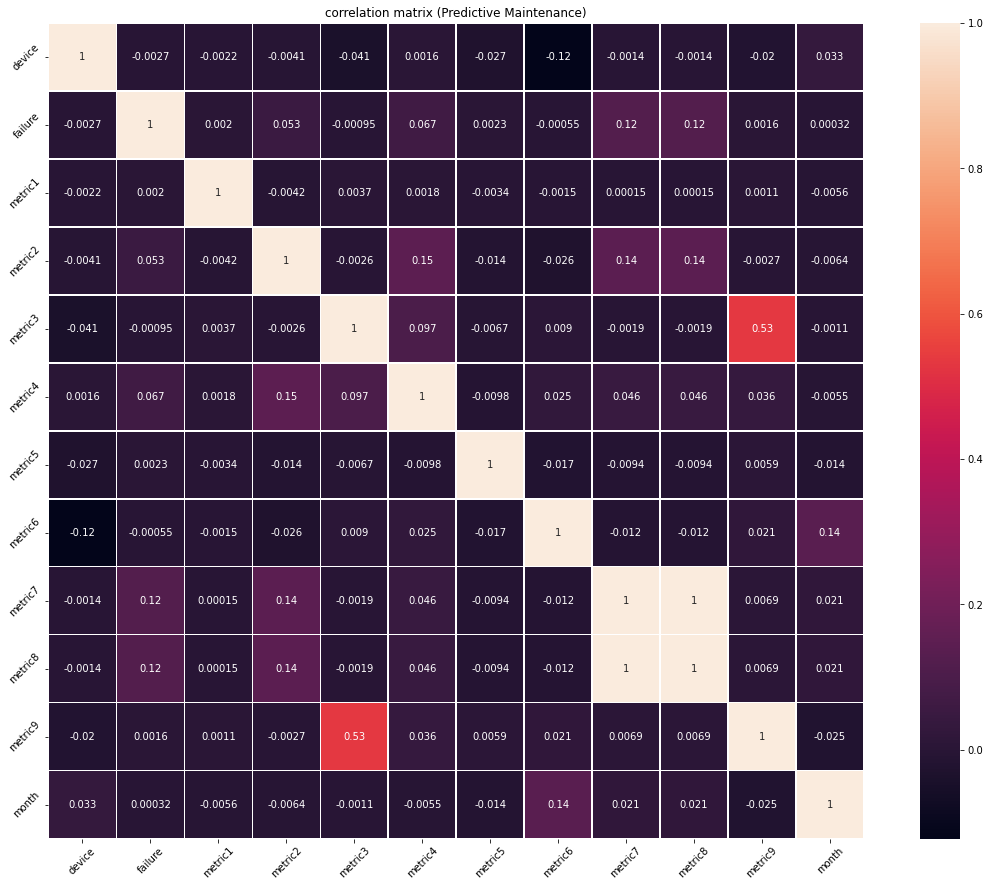

In [ ]:
plt.figure(figsize = (20,15))
sns.heatmap(u, square=True, annot=True, linewidths=.5)
plt.title("correlation matrix (Predictive Maintenance)")
plt.xticks(rotation=45)
plt.yticks(rotation=45)

## Now lets also see the Pairplots of the variables to further look into the connections between them. Decided not to color by failure because there are only .1% failures in the dataset, and the data would likely not clearly define differences. Also the hue takes to long to apply to the pairplots.



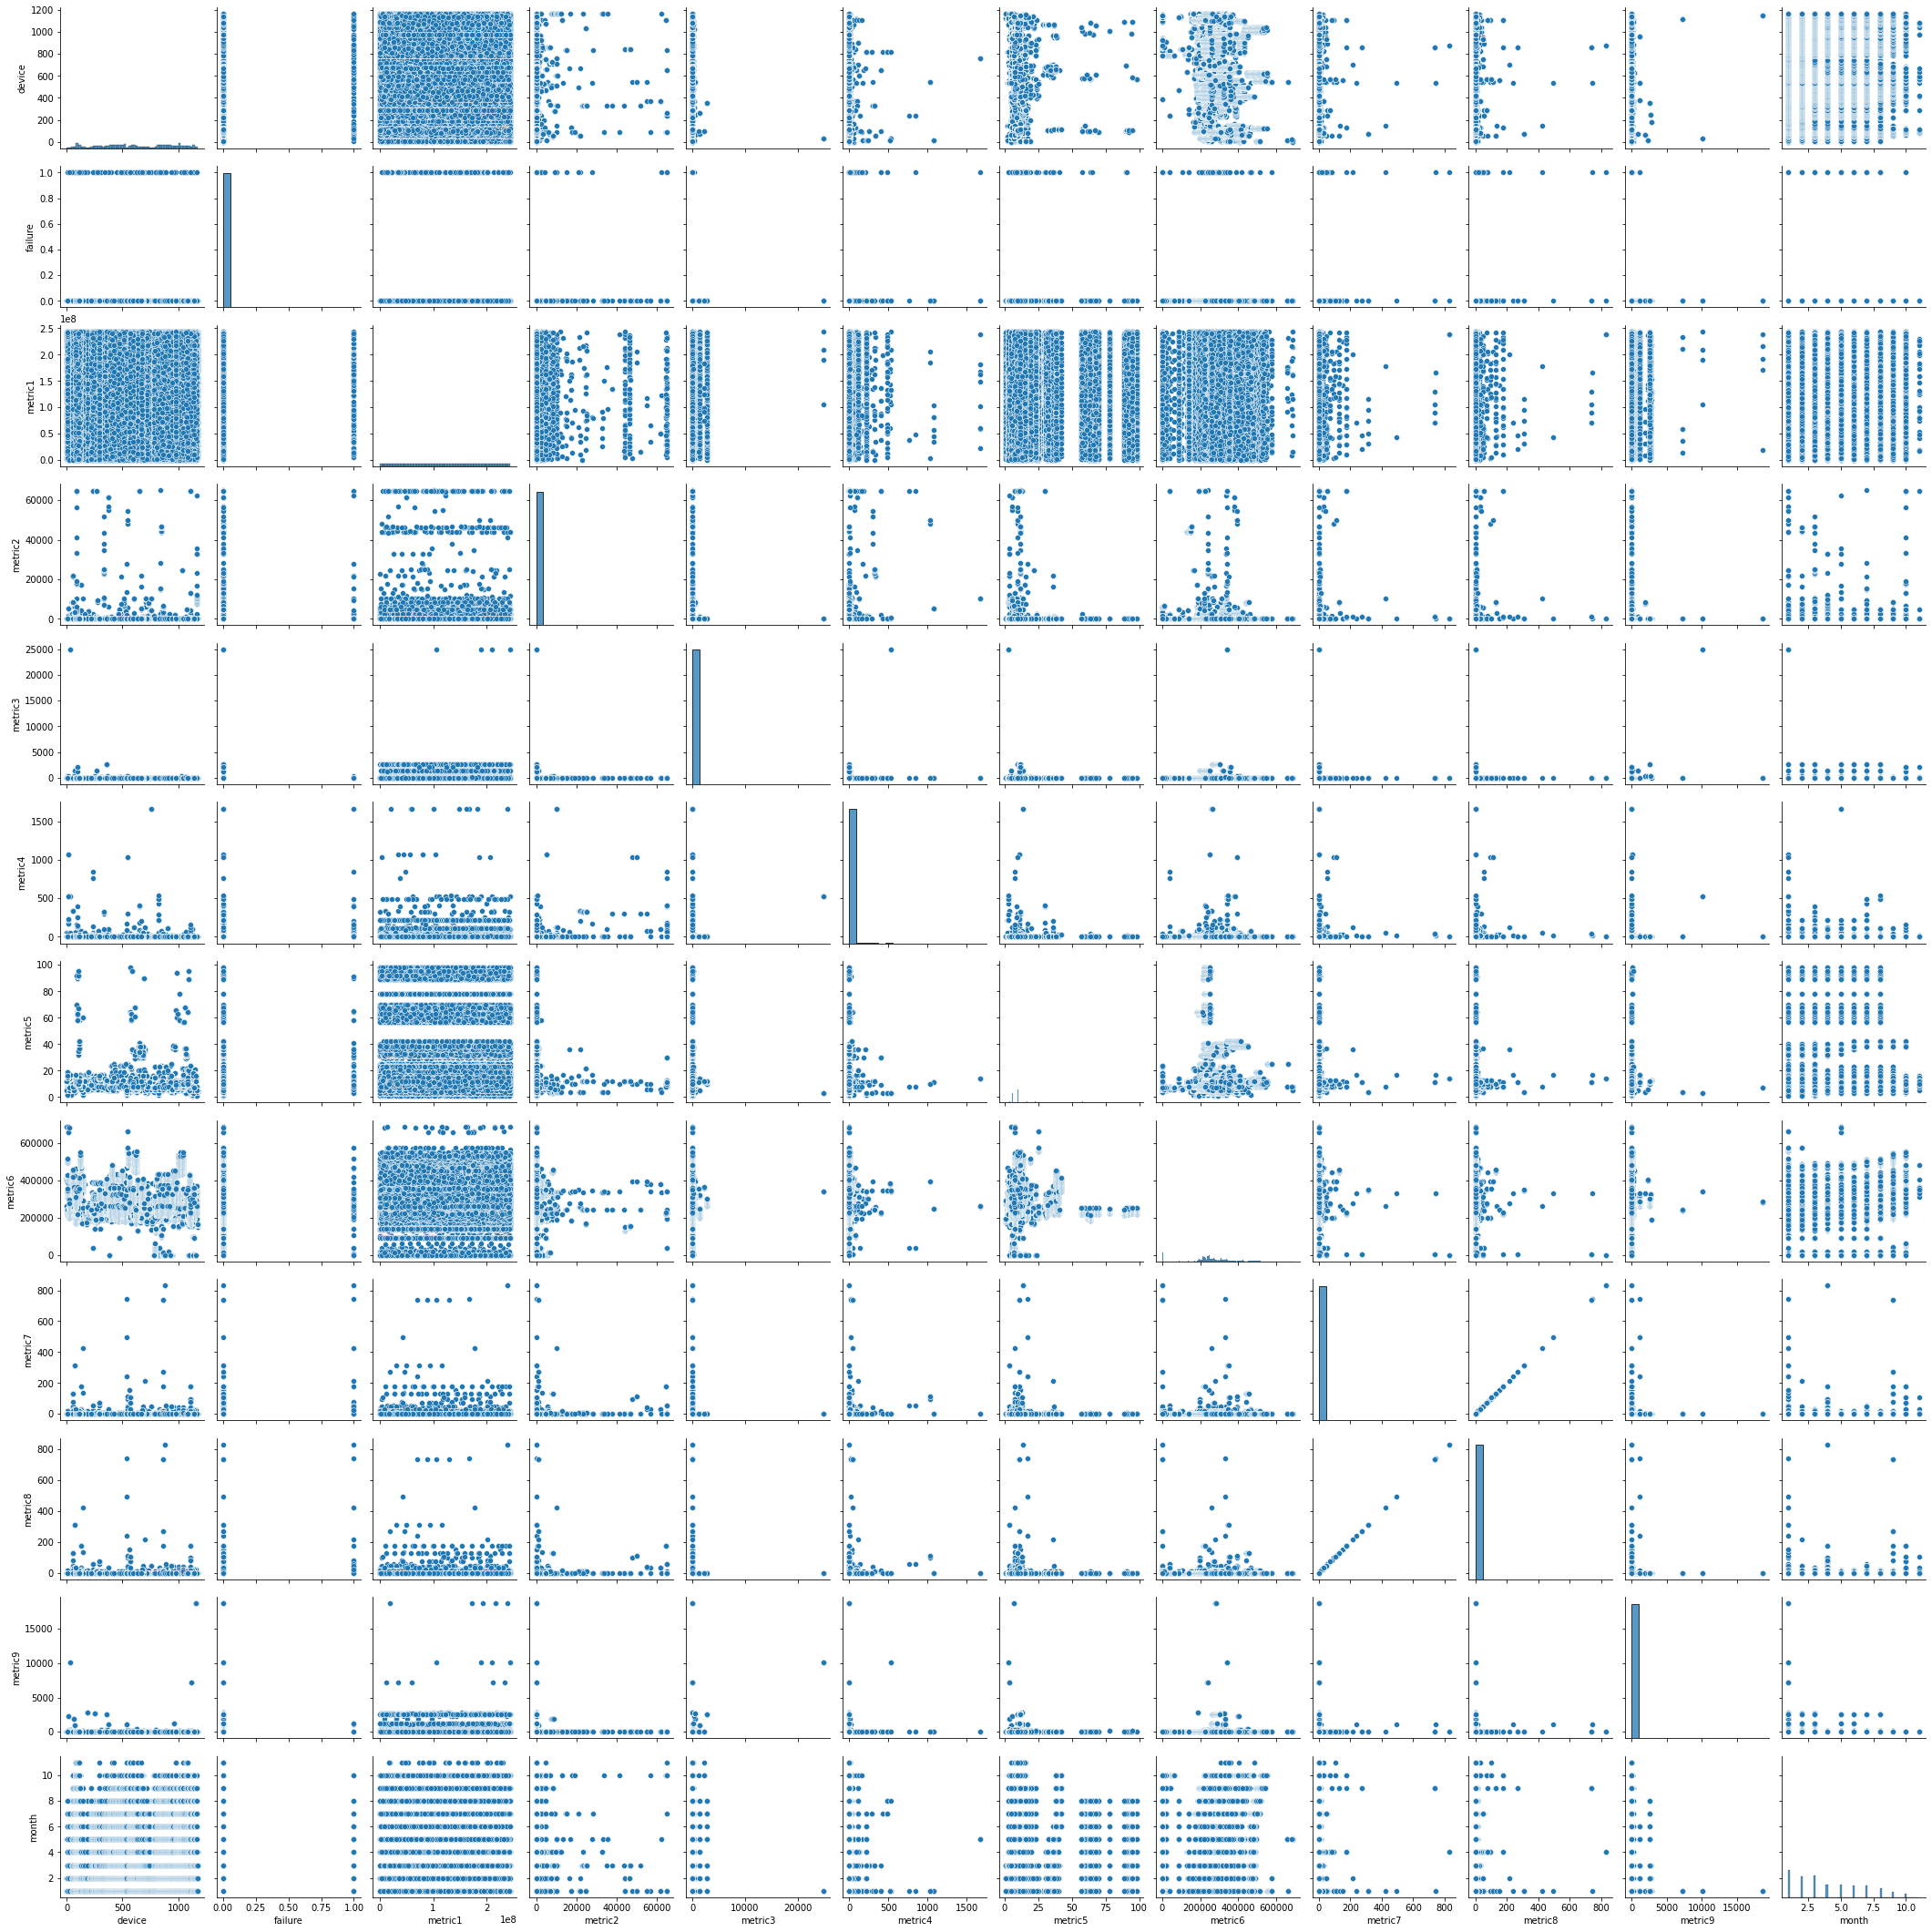

In [ ]:
sns.pairplot(x)
plt.show()

In [ ]:
PM_df

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,month,year
0,1/1/15,S1F01085,0,215630672,56,0,52,6,407438,0,0,7,1,15
1,1/1/15,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0,1,15
2,1/1/15,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0,1,15
3,1/1/15,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0,1,15
4,1/1/15,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124489,11/2/15,Z1F0MA1S,0,18310224,0,0,0,10,353705,8,8,0,11,15
124490,11/2/15,Z1F0Q8RT,0,172556680,96,107,4,11,332792,0,0,13,11,15
124491,11/2/15,Z1F0QK05,0,19029120,4832,0,0,11,350410,0,0,0,11,15
124492,11/2/15,Z1F0QL3N,0,226953408,0,0,0,12,358980,0,0,0,11,15


In [ ]:
PM_df['metric8'].equals(PM_df['metric7'])

True

As you can see metric 8 and metric 7 are identical after the .equals() is done.

In [ ]:
PM_df2 = PM_df2.drop(['metric8'], axis=1)

# Now let us start training models, we can go ahead and use PCA to lessen the dimension of the set, and create 2 or 3 principle components. Then, try to make predictions:


In [ ]:
def rand_index_score(grount_truths, predictions):
    tp_plus_fp = comb(np.bincount(grount_truths), 2).sum()
    tp_plus_fn = comb(np.bincount(grount_truths), 2).sum()
    A = np.c_[(grount_truths, predictions)]
    tp = sum(comb(np.bincount(A[A[:, 0] == i, 1]), 2).sum()
             for i in set(grount_truths))
    fp = tp_plus_fp - tp
    fn = tp_plus_fn - tp
    tn = comb(len(A), 2) - tp - fp - fn
    return (tp + tn) / (tp + fp + fn + tn)

### Let us set our X/Y variables (features and labels). Also set our standardized X variable for our PCA. Also we will split them into a test and training set. 

In [ ]:
scaler = StandardScaler()
X = PM_df2.drop(['date','failure'], axis=1)
Y = PM_df2['failure']
y1 = PM_df2['failure']
X_std = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=40)
X_std_train = scaler.fit_transform(X_train)
X_std_test = scaler.fit_transform(X_test)
print('the shape of the training sets are shown here:',X_train.shape,y_train.shape)
print('\n\n the shape of the test sets are shown here:',X_test.shape,y_test.shape)

the shape of the training sets are shown here: (87145, 10) (87145,)


 the shape of the test sets are shown here: (37349, 10) (37349,)


### Create our PCA transforms

In [ ]:
pca_2 = PCA(n_components=2).fit_transform(X_std_train)
pca_3 = PCA(n_components=3).fit_transform(X_std_train)


(87145, 2)
(87145, 3)


In [ ]:
'''print(pca_2.shape)
print(pca_3.shape)
print(y_train.shape)
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_std.shape)'''

In [ ]:
plt.figure(figsize=(15,10))
plt.scatter(pca_2[:, 0], pca_2[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()
plt.figure(figsize=(10,5))
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]


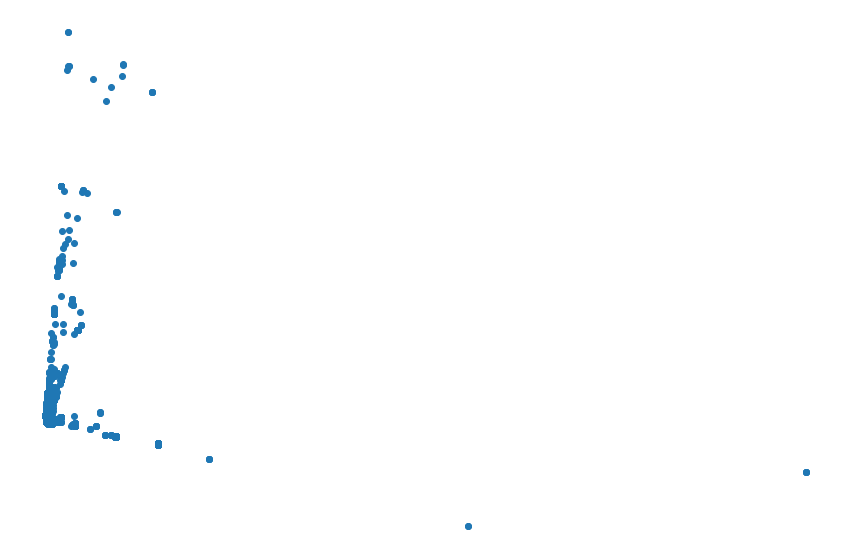

<Figure size 720x360 with 0 Axes>

In [ ]:
plt.figure(figsize=(15,10))
plt.scatter(pca_3[:, 0], pca_3[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()
plt.figure(figsize=(10,5))
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]


In [ ]:
def model_plotter(model,y_test,y_preds,X_test,X_train):
  print('Here is the CrossTab of the model:\n')
  print(pd.crosstab(y_test,y_preds))
  print('\nrand index score:')
  print(rand_index_score(y1, full_pred))
  print('\nadjusted rand score :')
  print(adjusted_rand_score(y1, full_pred))
  return 

### Below for a Kmeans model you can see 92 incorrectly labeled Failures and 14 correctly labeled failures. Which is 80% of all failures are incorrectly labeled. While less than 1% of non failures are incorrectly labeled.

In [ ]:
full_pred = KMeans(n_clusters=2, random_state=1000).fit_predict(pca_2)
print('\ncrosstab:')
print(pd.crosstab(y1, full_pred))
print('\nrand index score:')
print(rand_index_score(y1, full_pred))
print('\nadjusted rand score :')
print(adjusted_rand_score(y1, full_pred))
print('\n sillouette score:')
labels = KMeans(n_clusters=2, random_state=1000).fit_predict(pca_2)
print(silhouette_score(pca_2, labels))


crosstab:
col_0         0    1
failure             
0        124095  293
1            92   14

rand index score:
0.9906156558657545

adjusted rand score :
0.06640839026277445

 sillouette score:
0.9750610870762828


#### As you can see there are 293 false failures, and 92 false positives. 

### Below is a Random Forest Classifier. As you can see in the test set it predicts 4 failures. Out of those 4 failures 0 are correctly labeled, Also none of the actual failures were correctly classified. Therfore this will not be a useful model.

### The reason the accuracy is so high, is because only 0.1% of the data is failures. So accuracy/score is not the best thing to go for optimal performance.

In [ ]:
RFC = RandomForestClassifier(n_estimators = 3,random_state=1234).fit(X_train,y_train)
RFC_Labels = RFC.predict((X_test))


print('\n\n accurary of model: ', metrics.accuracy_score(y_test,RFC_Labels))
print('\n summary of y_test:')
#print(pd.DataFrame(y_test).groupby("failure")["failure"].count())
y_pred = pd.DataFrame()
print('\n summary of y_predictions:')
y_pred['correct_failure_labels'] = pd.DataFrame(y_test)
y_pred['failure_pred'] = pd.DataFrame(RFC_Labels)
print(y_pred.value_counts())
#print(y_pred.groupby("failure")["failure"].count())



 accurary of model:  0.9989022463787518

 summary of y_test:

 summary of y_predictions:
correct_failure_labels  failure_pred
0                       0.000           11136
1                       0.000               8
0                       1.000               4
dtype: int64


####As you can see below with feature importance selections done using Random Forest Classifiers. Metric 9 and Metric 3 are both fairly low importance. Let us try dropping them and seeing how our RFC changes. Assuming this model was being used, a deeper dive into feature importance may provide value.

In [ ]:
feature_imp = pd.Series(RFC.feature_importances_, index = X_train.columns).sort_values(ascending = False)
print(feature_imp)


metric6   0.292
metric1   0.231
metric5   0.101
metric4   0.089
metric7   0.076
device    0.069
metric2   0.061
month     0.059
metric9   0.020
metric3   0.002
dtype: float64


In [ ]:
RFC = RandomForestClassifier(n_estimators = 3,random_state=1234).fit(X_train.drop(columns = ['metric9','metric3']),y_train)
RFC_Labels = RFC.predict((X_test.drop(columns = ['metric9','metric3'])))


print('\n\n accurary of model: ', metrics.accuracy_score(y_test,RFC_Labels))
print('\n summary of y_test:')
#print(pd.DataFrame(y_test).groupby("failure")["failure"].count())
y_pred = pd.DataFrame()
print('\n summary of y_predictions:')
y_pred['correct_failure_labels'] = pd.DataFrame(y_test)
y_pred['failure_pred'] = pd.DataFrame(RFC_Labels)
print(y_pred.value_counts())
#print(y_pred.groupby("failure")["failure"].count())



 accurary of model:  0.9989557953358859

 summary of y_test:

 summary of y_predictions:
correct_failure_labels  failure_pred
0                       0.000           11137
1                       0.000               8
0                       1.000               3
dtype: int64


### Below is a Gausian Mixture model:

#### From the crosstabs below it seems as though 5% of all measurements are marked as Failures. Of these 5% (~5000) values roughly 65 (50/76) of the real failures are captured.

#### A further deep dive into the data you can see the 5% of measurements equated to roughly 208 

#### Notice the Rand index score is also highest with PCA 2, for all sets the adjusted RI score is pretty low showing that the labeled values are very split across different clusters.This tradeoff may be worth it to leadership since ~65% of failures are caught.

#### So the chosen model is the pca_3 model or gmm_cluster.fit_predict(pca_3)

In [ ]:
gmm_cluster = GaussianMixture(n_components=2, random_state=123)

# Fit model
clusters = gmm_cluster.fit_predict(pca_2)
clusters_1 = gmm_cluster.fit_predict(pca_3)
gmm_cluster_2 = gmm_cluster.fit(X_train,y_train)
clusters_2 = gmm_cluster_2.predict(X_test)

In [ ]:
original_data_set = X_train
original_data_set['y_train'] = y_train
original_data_set['gmm_labels'] = clusters_1.astype(int)

In [ ]:
original_data_set.head(5)

,device,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric9,month,y_train,gmm_labels
101519,861,50631072,0,0,0,7,31,0,0,7.000,0,0
45685,875,172880536,0,0,0,12,249136,0,0,3.000,0,0
32980,246,138763472,0,0,0,8,194458,0,3,2.000,0,0
68796,870,126539512,0,0,0,9,220792,0,0,4.000,0,0
97168,114,192846456,0,0,30,42,360218,0,14,6.000,0,1


In [ ]:
predicted_failures = original_data_set.loc[original_data_set['gmm_labels'] == int(1)]
original_failures = original_data_set.loc[original_data_set['y_train'] == int(1)]
original_failures_and_predicted = original_failures.loc[original_failures['gmm_labels'] == int(1)]
print('Through this model the amount of devices that showed a failure are {} out of {} , or {} % of the training set'
.format(predicted_failures['device'].nunique(),original_data_set['device'].nunique(),(predicted_failures['device'].nunique()/original_data_set['device'].nunique())*100))

print('The actual number of devices that is {} out of {} , or {} % of the training set'
.format(original_failures['device'].nunique(),original_data_set['device'].nunique(),(original_failures['device'].nunique()/original_data_set['device'].nunique())*100))


print('The amount of devices that are correctly predicted as failures are {} out of {} , or {} % of the training set'
.format(original_failures_and_predicted['device'].nunique(),original_failures['device'].nunique(),(original_failures_and_predicted['device'].nunique()/original_failures['device'].nunique())*100))

Through this model the amount of devices that showed a failure are 208 out of 1168 , or 17.80821917808219 % of the training set
The actual number of devices that is 76 out of 1168 , or 6.506849315068493 % of the training set
The amount of devices that are correctly predicted as failures is 50 out of 76 , or 65.78947368421053 % of the training set


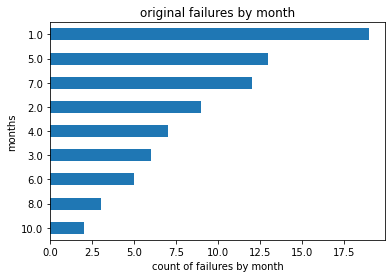

In [ ]:
ax = original_failures.month.value_counts().sort_values().plot(kind = 'barh',title = 'original failures by month')
ax.set_xlabel("count of failures by month")
ax.set_ylabel("months")
plt.show()

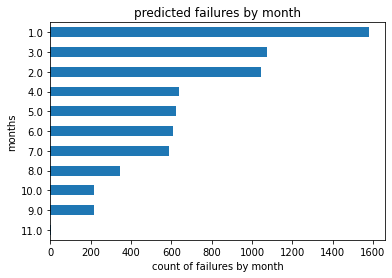

In [ ]:
ax = predicted_failures.month.value_counts().sort_values().plot(kind = 'barh',title = 'predicted failures by month')
ax.set_xlabel("count of failures by month")
ax.set_ylabel("months")
plt.show()

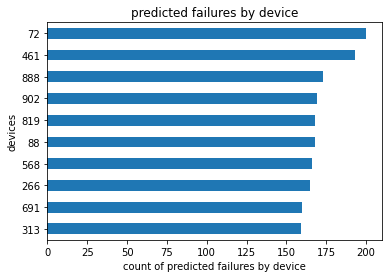

In [ ]:
ax = predicted_failures.device.value_counts().sort_values(ascending = True).tail(10).plot(kind = 'barh',title = 'predicted failures by device')
ax.set_xlabel("count of predicted failures by device")
ax.set_ylabel("devices")
plt.show()

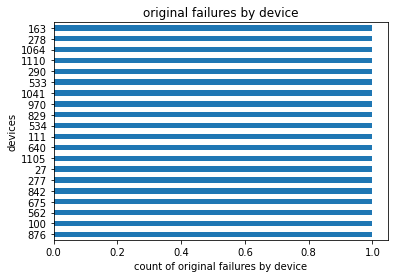

In [ ]:
ax = original_failures.device.value_counts().sort_values(ascending = True).tail(20).plot(kind = 'barh',title = 'original failures by device')
ax.set_xlabel("count of original failures by device")
ax.set_ylabel("devices")
plt.show()

This model is showing more failures happening during the begining of the year.

In [ ]:
original_data_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87145 entries, 101519 to 11590
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   device      87145 non-null  int64  
 1   metric1     87145 non-null  int64  
 2   metric2     87145 non-null  int64  
 3   metric3     87145 non-null  int64  
 4   metric4     87145 non-null  int64  
 5   metric5     87145 non-null  int64  
 6   metric6     87145 non-null  int64  
 7   metric7     87145 non-null  int64  
 8   metric9     87145 non-null  int64  
 9   month       87145 non-null  float64
 10  y_train     87145 non-null  int64  
 11  gmm_labels  87145 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 10.7 MB


In [ ]:
original_data_set.head(5)

,device,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric9,month,y_train,gmm_labels
101519,861,50631072,0,0,0,7,31,0,0,7.000,0,0
45685,875,172880536,0,0,0,12,249136,0,0,3.000,0,0
32980,246,138763472,0,0,0,8,194458,0,3,2.000,0,0
68796,870,126539512,0,0,0,9,220792,0,0,4.000,0,0
97168,114,192846456,0,0,30,42,360218,0,14,6.000,0,1


In [ ]:
print('\ncrosstab for a Gaussian Mixture Model with 2 dimension PCA reduction done:')
print(pd.crosstab(y_train, clusters))
print('\nrand index score:')
print(rand_index_score(y_train, clusters))
print('adjusted rand score :')
print(adjusted_rand_score(y_train, clusters))

print('\n\ncrosstab for a Gaussian Mixture Model with 3 dimension PCA reduction done:')
print(pd.crosstab(y_train, clusters_1))
print('\nrand index score:')
print(rand_index_score(y_train, clusters_1))
print('adjusted rand score :')
print(adjusted_rand_score(y_train, clusters_1))

print('\n\ncrosstab for X,Y train_test_split:')
print(pd.crosstab(y_test, clusters_2))
print('\nrand index score:')
print(rand_index_score(y_test, clusters_2))
print('adjusted rand score :')
print(adjusted_rand_score(y_test, clusters_2))


crosstab for a Gaussian Mixture Model with 2 dimension PCA reduction done:
col_0        0     1
failure             
0        82711  4358
1           35    41

rand index score:
0.810140534918243
adjusted rand score :
0.0157538721285485


crosstab for a Gaussian Mixture Model with 3 dimension PCA reduction done:
col_0        0     1
failure             
0        80179  6890
1           26    50

rand index score:
0.7090214966496088
adjusted rand score :
0.011466432216043206


crosstab for X,Y train_test_split:
col_0        0     1
failure             
0        32596  4723
1            9    21

rand index score:
0.5585348241408116
adjusted rand score :
0.00616518967366445


## Below are some Regression models.

#### As you can see below Random Forest regression is getting 0 correct values for labeling failures. It is calling all failures 0 or that they arent failing. It also has a negative score on test data and 84% on the training set. This is because it is giving a probability between 0-1 for all values. So anything with a probability will likely have a negative impact on score (because its not equal to 0). Either way this model will not be chosen, because for the prediction of 0 it is marking all failures as 0.

In [ ]:

rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
print("Score on train data : " + str(rf_reg.score(X_train, y_train)))
print("Score on test data : " + str(rf_reg.score(X_test, y_test)))
y_preds = rf_reg.predict(X_test)
rfr_pred = pd.DataFrame()
rfr_pred['prediction'] = pd.DataFrame(y_preds)
rfr_pred['y_test'] = pd.DataFrame(y_test)
print(pd.crosstab(rfr_pred['y_test'],rfr_pred['prediction']))

Score on train data : 0.8446966242086584
Score on test data : -0.09862995732736657
prediction  0.000  0.010  0.020  0.030  0.040  0.050  0.060  0.070  0.090  \
y_test                                                                      
0.000       11005     61     17      9      7      5      4      7      4   
1.000           8      0      0      0      0      0      0      0      0   

prediction  0.100  ...  0.160  0.170  0.240  0.250  0.260  0.320  0.370  \
y_test             ...                                                    
0.000           3  ...      1      2      1      1      1      1      1   
1.000           0  ...      0      0      0      0      0      0      0   

prediction  0.470  0.500  0.610  
y_test                           
0.000           1      1      1  
1.000           0      0      0  

[2 rows x 24 columns]


#### As you can see below logistic regression is getting 0 correct values for labeling failures. It is calling everyone a "0" or non-Failure. It is also saying 99% score because a very small amount of values are failures. This model is not going to be chosen.

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print("Score on train data : " + str(logreg.score(X_train, y_train)))
print("Score on test data : " + str(logreg.score(X_test, y_test)))


Score on train data : 0.999104940042458
Score on test data : 0.9991967656429891


In [ ]:
log_reg = pd.DataFrame()
log_reg['prediction'] = pd.DataFrame(y_pred)
log_reg['y_test'] = pd.DataFrame(y_test)
print(pd.crosstab(log_reg['y_test'],log_reg['prediction']))

prediction      0
y_test           
0.000       11140
1.000           8
